# Enactus Timelog Analysis
The Enactus DCU Timelog found at [enactusdcu-timelog.com](enactusdcu-timelog.com) is used by members to track their time spent on Enactus activities including events, meetings, project development and research. This data has been cleaned, analysed and visualised. This notebook performs this work. The following notebook presents a summary of the results.

In [6]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
%matplotlib inline

In [7]:
# Setting Parking Style
def set_parking_protect_style():
    sns.set_style('white')
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['patch.edgecolor'] = 'white'

set_parking_protect_style()

In [8]:
df = pd.read_json('../data/timelogger.json')

In [9]:
df

,-N5pQDq-MRa5sJpOGOCh,-N5qacgs4VOSkU44G_fP,-N5vQ4iJNzNOMcdUPJnh,-N5vQLdaq7S4tArOUoT5,-N68N7Hn5VIhcYCxK07e,-N69Mby9oAOaK5JPm6Nz,-N69McfmSZZ78VLgS4tD,-N69MivYBvbmqhTTWcHM,-N69NE0xnK4iPcjVlUsj,-N69NggxWZik9swNKaCR,...,-NGT6UxI1Yxq636aVEIj,-NGT6XE33Pyu2S588xfy,-NGWC17l7h6sPS8x_81q,-NGXOb1TerJmnYYAQcQ1,-NGXb9F5y7vGZZ1fXzKL,-NGXbCvAAT7khDviGrZ4,-NGY3qMIDzZZfqo-GYGt,-NGZFgLFYGNcQauC3cAa,-NGZFsPf56TmEEjc2pdZ,-NGZOUGLhNG66RfRzKGJ
date,30:06:2022,30:06:2022,01:07:2022,01:07:2022,04:07:2022,04:07:2022,04:07:2022,04:07:2022,04:07:2022,04:07:2022,...,09:11:2022,09:11:2022,10:11:2022,10:11:2022,10:11:2022,10:11:2022,10:11:2022,11:11:2022,11:11:2022,11:11:2022
hour,16:18:53,21:52:22,20:20:44,20:20:44,13:18:48,16:44:23,16:44:23,16:44:23,16:44:23,18:04:41,...,20:38:55,20:39:04,11:01:57,16:36:31,17:35:43,17:35:58,19:45:26,01:16:48,01:17:37,01:55:14
name,KJT,NG,KJT,NG,NG,DK,BM,MS,KJT,NG,...,Klara Tamchynova,Klara Tamchynova,Kevin James,Kevin James,Sadhana R Sambandam,Sadhana R Sambandam,Kevin James,Diarmuid Brady,Diarmuid Brady,Diarmuid Brady
reason,Development,Development,Development,Meeting,Research,Meeting,Meeting,Meeting,Meeting,Meeting,...,Meeting,Research,Development,Meeting,Meeting,Development,Development,Meeting,Development,Development
time,360,120,60,67,138,60,60,60,60,60,...,60,120,30,60,70,120,120,60,210,100
from,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,website,website,website,website,website,website,website,website,website,website
photoURL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://lh3.googleusercontent.com/a-/ACNPEu-68...,https://lh3.googleusercontent.com/a-/ACNPEu-68...,https://lh3.googleusercontent.com/a-/AFdZucp1W...,https://lh3.googleusercontent.com/a-/AFdZucp1W...,https://lh3.googleusercontent.com/a-/ACNPEu8yu...,https://lh3.googleusercontent.com/a-/ACNPEu8yu...,https://lh3.googleusercontent.com/a-/AFdZucp1W...,https://lh3.googleusercontent.com/a/ALm5wu1Z-u...,https://lh3.googleusercontent.com/a/ALm5wu1Z-u...,https://lh3.googleusercontent.com/a/ALm5wu1Z-u...


## Processing
The dataframe is a transposed version of what we want.
We need to:
- Transpose the Dataframe
- Rename columns
- Change data types

In [10]:
df = df.T
df.head()

,date,hour,name,reason,time,from,photoURL
-N5pQDq-MRa5sJpOGOCh,30:06:2022,16:18:53,KJT,Development,360,NaN,NaN
-N5qacgs4VOSkU44G_fP,30:06:2022,21:52:22,NG,Development,120,NaN,NaN
-N5vQ4iJNzNOMcdUPJnh,01:07:2022,20:20:44,KJT,Development,60,NaN,NaN
-N5vQLdaq7S4tArOUoT5,01:07:2022,20:20:44,NG,Meeting,67,NaN,NaN
-N68N7Hn5VIhcYCxK07e,04:07:2022,13:18:48,NG,Research,138,NaN,NaN


In [11]:
df.columns = ['Date', 'Time', 'Name', 'Reason', 'Duration', 'FromWebsite', 'PhotoURL']

In [12]:
# Checking out the Reason columns before converting it to Categorical Data
df.Reason.value_counts()

Meeting        87
Development    56
Event          21
Research       16
Work            3
Name: Reason, dtype: int64

We see that Work only has 3 entries, this is because it was a mistake at the time and it should be Development instead, we need to change this.

In [13]:
df.loc[df.Reason == 'Work', 'Reason'] = 'Development'

I want to check what values are contained in the FromWebsite column.

In [14]:
df.FromWebsite.value_counts()

website        113
discord bot     49
Name: FromWebsite, dtype: int64

Let's change these to Website and Discord Bot

In [15]:
df.FromWebsite.replace(['website', 'discord bot'], ['Website', 'Discord Bot'], inplace=True)

In [16]:
# Changing all the data types
# Note that new columns are being created rather than changing the original columns 
# this ensures we can validate the changes made
df['Datetime'] = pd.to_datetime(df.Date + ':' + df.Time, format='%d:%m:%Y:%H:%M:%S')
df['Reason_cat'] = pd.Categorical(df.Reason, ['Meeting', 'Development', 'Event', 'Research'], ordered=True)
df.Duration = df.Duration.astype('int64')
df['FromWebsite_cat'] = pd.Categorical(df.FromWebsite, ['Website', 'Discord Bot'], ordered=True)
df = df.set_index('Datetime').reset_index()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         183 non-null    datetime64[ns]
 1   Date             183 non-null    object        
 2   Time             183 non-null    object        
 3   Name             183 non-null    object        
 4   Reason           183 non-null    object        
 5   Duration         183 non-null    int64         
 6   FromWebsite      162 non-null    object        
 7   PhotoURL         111 non-null    object        
 8   Reason_cat       183 non-null    category      
 9   FromWebsite_cat  162 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(1), object(6)
memory usage: 12.2+ KB


In [18]:
df.head()

,Datetime,Date,Time,Name,Reason,Duration,FromWebsite,PhotoURL,Reason_cat,FromWebsite_cat
0,2022-06-30 16:18:53,30:06:2022,16:18:53,KJT,Development,360,NaN,NaN,Development,NaN
1,2022-06-30 21:52:22,30:06:2022,21:52:22,NG,Development,120,NaN,NaN,Development,NaN
2,2022-07-01 20:20:44,01:07:2022,20:20:44,KJT,Development,60,NaN,NaN,Development,NaN
3,2022-07-01 20:20:44,01:07:2022,20:20:44,NG,Meeting,67,NaN,NaN,Meeting,NaN
4,2022-07-04 13:18:48,04:07:2022,13:18:48,NG,Research,138,NaN,NaN,Research,NaN


I also only want data from September 2022 onward. We will filter out the records before this point.

In [225]:
df = df.loc[df.Datetime.dt.month >= 9]

## Cleaning up Name Values
Some people have entered time on the Website using their email and discord using the bot. We need to ensure that the values are consistent, so we can get an accurate representation of the work each person has put in.

In [19]:
df.Name.value_counts()

Kevin James                51
KJT                        26
NG                         14
Niamh Gowran               13
MS                         11
Diarmuid Brady             10
Klara Tamchynova            9
AZW                         8
Alethea Zainab Williams     7
DB                          7
Sadhana R Sambandam         6
Darragh Manning             4
Suzanne Jackson             3
Stephen Murnane             3
LH                          2
NC                          2
Calem Mc Glynn              2
Nino Candrlic               1
BM                          1
DK                          1
Teniola Malomo              1
Naman Chauhan               1
Name: Name, dtype: int64

We can map each Initial back to the full name

In [20]:
initials = {
    'KJT': 'Kevin James', 
    'AZW': 'Alethea Zainab Williams',
    'NG': 'Niamh Gowran', 
    'MS': 'Malavika',  
    'DB': 'Diarmuid Brady', 
    'NC': 'Nino Czanderlitch', 
    'LH': 'Lina', 
    'BM': 'BM', 
    'DK': 'BM'
}

In [21]:
for k in initials.keys():
    df.Name.replace(k, initials[k], inplace=True)

In [22]:
df.Name.value_counts()

Kevin James                77
Niamh Gowran               27
Diarmuid Brady             17
Alethea Zainab Williams    15
Malavika                   11
Klara Tamchynova            9
Sadhana R Sambandam         6
Darragh Manning             4
Stephen Murnane             3
Suzanne Jackson             3
BM                          2
Nino Czanderlitch           2
Lina                        2
Calem Mc Glynn              2
Naman Chauhan               1
Nino Candrlic               1
Teniola Malomo              1
Name: Name, dtype: int64

## Visualisation
In this section I will visualize the answers to a number of different questions

1. What Reason have people logged the most time for?
3. How has time logging changed over time?
2. Which People have logged the greatest number of times?
3. Which People have logged the most amount of time?

In [23]:
parking_protect_palette = ['#5b87c6', '#174484', '#9cb7dc', '#8ce9ee']

### What Reason Have People Logged the Most Time For?

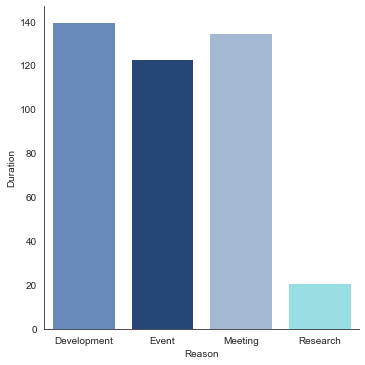

In [24]:
df_agg = (df.groupby('Reason')['Duration'].sum() / 60).reset_index()
sns.catplot(data=df_agg, x='Reason', y='Duration', kind='bar', palette=parking_protect_palette);

### How Has Timelogging Changed Over Time?
To answer this question we need to first define a few columns.
- Month
- Week
- Weekday

In [25]:
df['Month_num'] = df.Datetime.dt.month.astype('int')
df['Month'] = pd.Categorical(df.Month_num.apply(lambda x: calendar.month_abbr[x]), 
                             ['Sep', 'Oct', 'Nov'], 
                             ordered=True)
df['Week'] = df.Datetime.dt.isocalendar().week.astype('int') - 36
df['Weekday'] = pd.Categorical(df.Datetime.dt.day_name(), ['Monday','Tuesday','Wednesday', 'Thursday',
                                                           'Friday', 'Saturday', 'Sunday'], ordered=True)

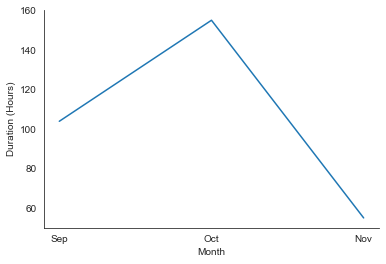

In [26]:
x = 'Month'
y = 'Duration'
df_agg = (df.groupby(x)[y].sum() / 60).reset_index()
sns.lineplot(data=df_agg, x=x, y=y)
plt.ylabel('Duration (Hours)');

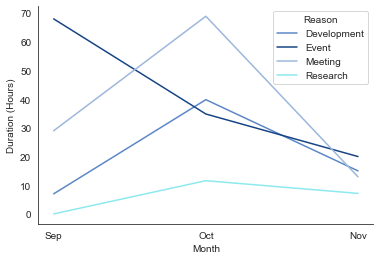

In [27]:
x = ['Month', 'Reason']
y = 'Duration'
df_agg = (df.groupby(x)[y].sum() / 60).reset_index()
sns.lineplot(data=df_agg, x=x[0], y=y, hue=x[1], palette=parking_protect_palette)
plt.ylabel('Duration (Hours)');

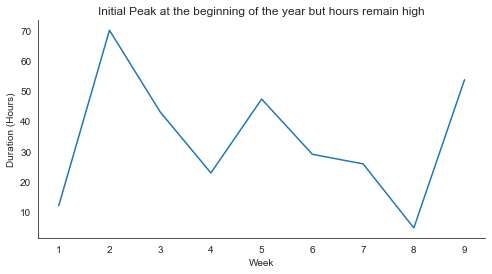

In [28]:
x = 'Week'
y = 'Duration'
df_agg = (df.loc[df['Week'] > 0].groupby(x)[y].sum() / 60).reset_index()
ax, fig = plt.subplots(figsize=(8, 4))
x = sns.lineplot(data=df_agg, x=x, y=y)
plt.ylabel('Duration (Hours)')
plt.title('Initial Peak at the beginning of the year but hours remain high')
plt.xticks(list(range(1, 10)));

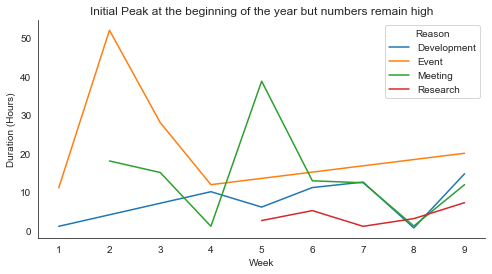

In [29]:
x = ['Week', 'Reason']
y = 'Duration'
df_agg = (df.loc[df['Week'] > 0].groupby(x)[y].sum() / 60).reset_index()
ax, fig = plt.subplots(figsize=(8, 4))
x = sns.lineplot(data=df_agg, x=x[0], y=y, hue=x[1], )
plt.ylabel('Duration (Hours)')
plt.title('Initial Peak at the beginning of the year but numbers remain high')
plt.xticks(list(range(1, 10)));

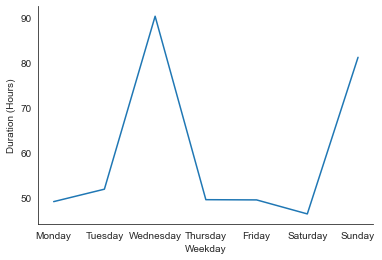

In [31]:
x = 'Weekday'
y = 'Duration'
df_agg = (df.groupby(x)[y].sum() / 60).reset_index()
sns.lineplot(data=df_agg, x=x, y=y)
plt.ylabel('Duration (Hours)');

### Which People Have Logged the Most Time?
Because there are so many people we will only choose the top 5

In [33]:
x = 'Name'
y = 'Duration'
top_five = df.groupby(x, as_index=False)[y].sum().sort_values(y, ascending=False).Name[:5].to_list()

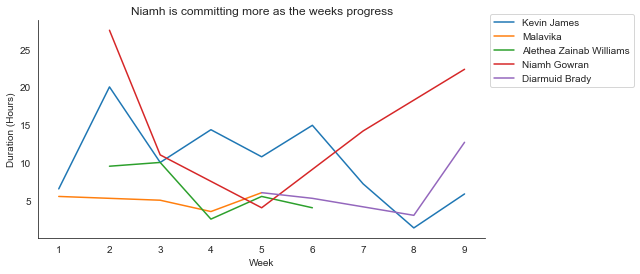

In [34]:
x = ['Week', 'Name']
y = 'Duration'
df_agg = (df.loc[(df['Week'] > 0) & (df.Name.isin(top_five))].groupby(x)[y].sum() / 60).reset_index()
ax, fig = plt.subplots(figsize=(8, 4))
x = sns.lineplot(data=df_agg, x=x[0], y=y, hue=x[1])
plt.ylabel('Duration (Hours)')
plt.title('Niamh is committing more as the weeks progress')
plt.xticks(list(range(1, 10)))
plt.legend(bbox_to_anchor=(1, 1.05));

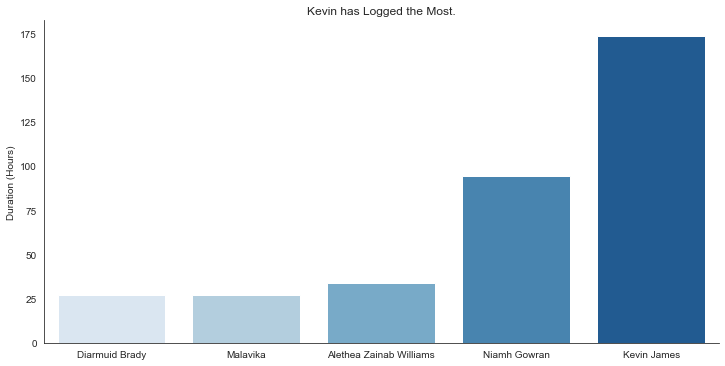

In [40]:
x = 'Name'
y = 'Duration'
top_five = df.groupby(x, as_index=False)[y].sum().sort_values(y, ascending=False).Name[:5].to_list()
df_agg = (df.loc[df.Name.isin(top_five)].groupby(x)[y].sum() / 60).reset_index().sort_values(y)
sns.catplot(data=df_agg, x=x, y=y, kind='bar', aspect=2, palette='Blues')
plt.title('Kevin has Logged the Most.')
plt.xlabel('')
plt.ylabel('Duration (Hours)');

In [41]:
# Outputting dataframe for use in the analysis report
df.to_pickle('../data/clean.pkl')